In [18]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [19]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [20]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [28]:
@staticmethod
def factor(df):
    '''量价趋势指标：结合价格变动和成交量'''
    price_change = df['close'].pct_change()
    vpt = (price_change * df['volume']).cumsum()
    return vpt

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.000802
   Rank_IC (Spearman): -0.002679
📊 信息比率:
   IR: 0.234954
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 129884
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


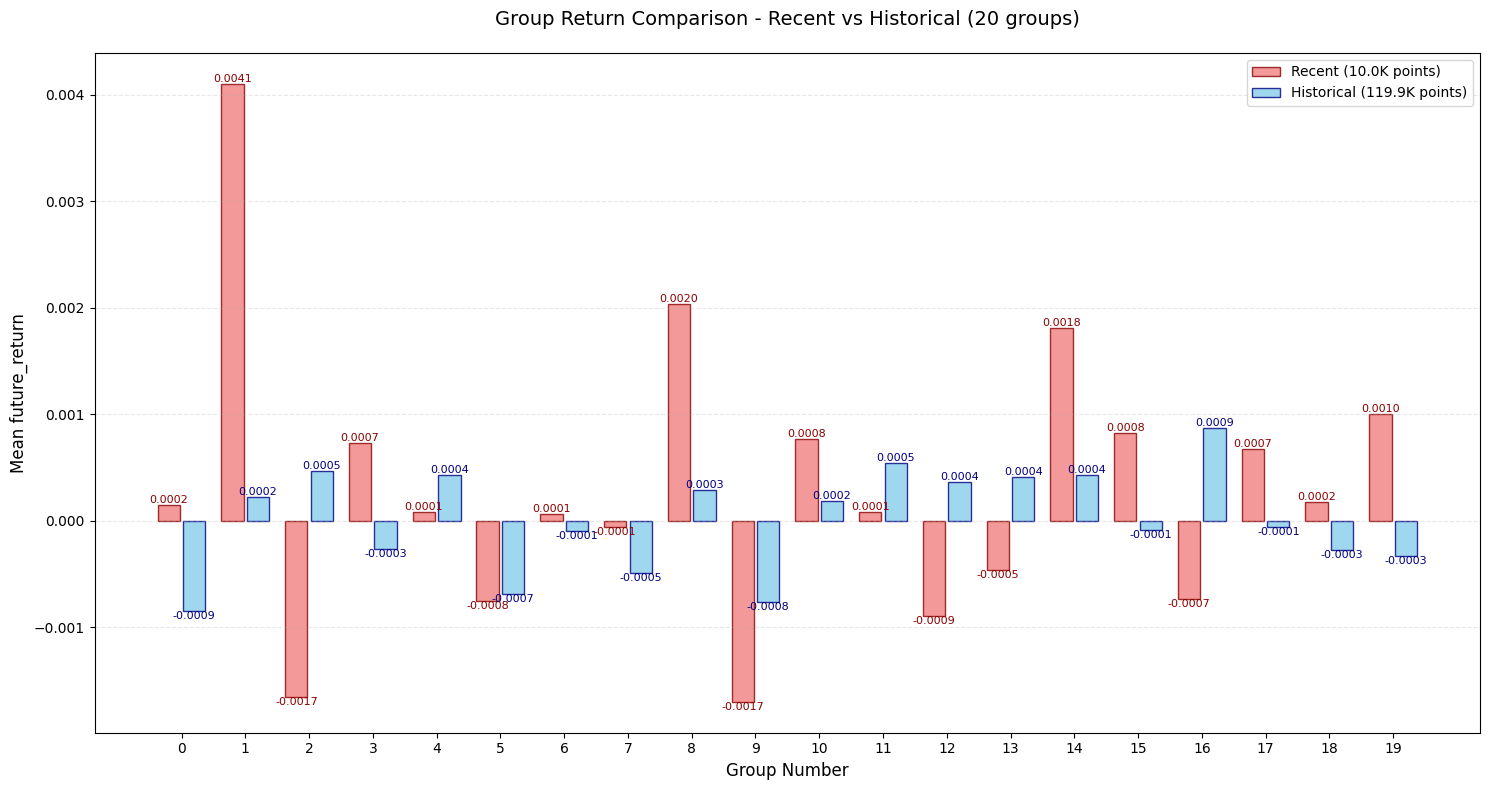

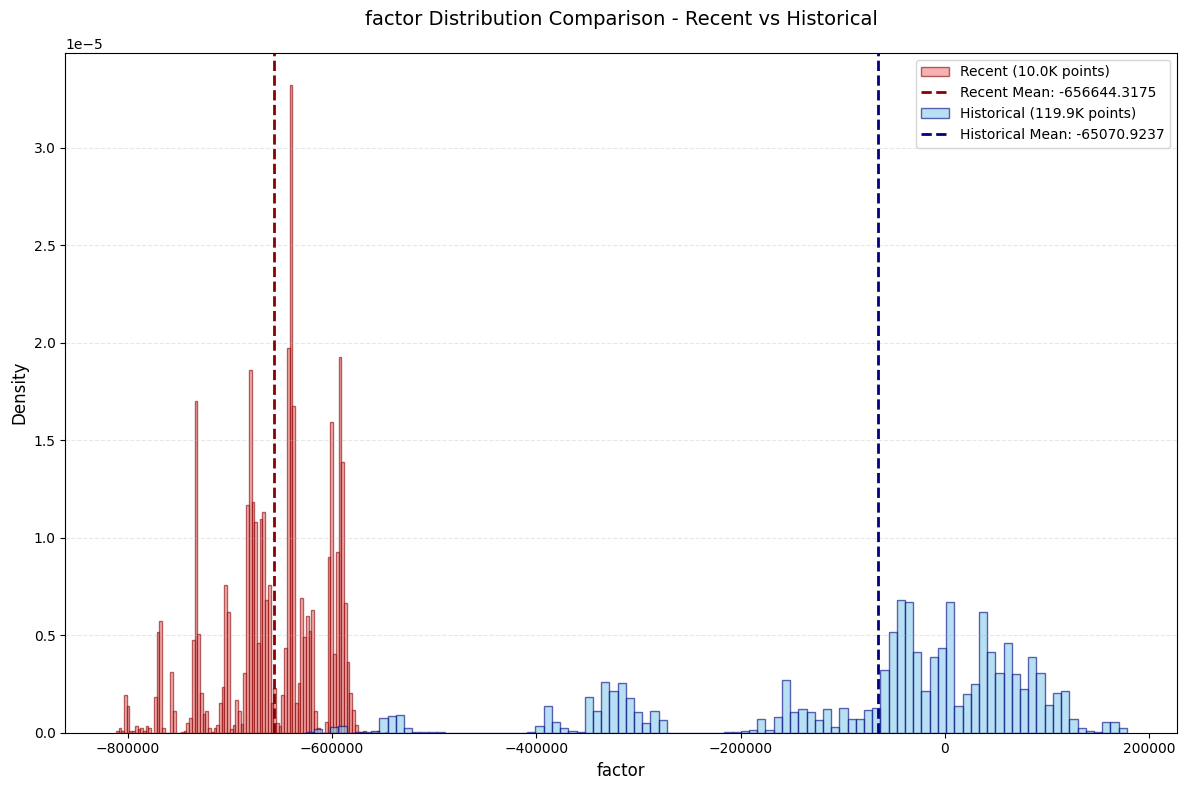

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [29]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

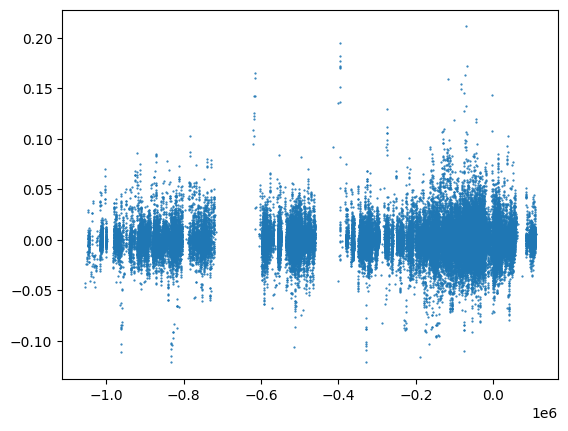

In [30]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [31]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.020429194055211465,
 0.07932551002701708,
 0.02112174108983672,
 0.03961263151094085,
 -0.000964326662380054,
 0.018878409716243154,
 -0.014265196457963472,
 -0.019742686589281216,
 -0.006392301961795584,
 -0.023798782446979964]

In [32]:
print(result)

{'correlation_analysis': {'IC': 0.0008024324246745418, 'Rank_IC': -0.0026794308274858667}, 'information_ratio': {'IR': 0.23495416956997422, 'group_correlations': [-0.020429194055211465, 0.07932551002701708, 0.02112174108983672, 0.03961263151094085, -0.000964326662380054, 0.018878409716243154, -0.014265196457963472, -0.019742686589281216, -0.006392301961795584, -0.023798782446979964], 'n_groups': 10}, 'group_analysis': {'group_stats':            val_min      val_max     val_mean  return_mean  return_std  count
group                                                                       
0     -811492.1854 -637525.1115 -684251.6212       0.0002      0.0123   6495
1     -637524.1559 -534102.9911 -584253.2835       0.0001      0.0133   6494
2     -534101.9570 -333171.4479 -380888.7441      -0.0005      0.0131   6494
3     -333170.9367 -313190.9359 -323700.9864       0.0004      0.0102   6494
4     -313189.0807 -160541.2917 -270285.8971      -0.0003      0.0126   6494
5     -160541.2576 -120